Importing the relevant libraries

In [15]:
import numpy as np
import pandas as pd
from scipy import stats
import statistics
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from statsmodels.formula.api import ols
import seaborn as sns
sns.set()

Load the data

In [16]:
#Load the data
data = pd.read_csv('~/Downloads/STARDOG-Brain_Segmentation_sparql_results.csv')
median_age = statistics.median(data['Age'])
data['age_group'] = data['Age'].apply(lambda x: 'Younger' if 0 <= x < median_age else 'Older')
data.head()

,ID,Sex,Age,brainvol_softwareLabel,brainvol,age_group
0,sub-001,Male,29,Brain Segmentation Volume (mm^3),1276568.0,Younger
1,sub-002,Male,30,Brain Segmentation Volume (mm^3),1201922.0,Older
2,sub-003,Male,29,Brain Segmentation Volume (mm^3),1076334.0,Younger
3,sub-004,Male,39,Brain Segmentation Volume (mm^3),1195437.0,Older
4,sub-005,Female,28,Brain Segmentation Volume (mm^3),1138787.0,Younger


Descriptive statistics

In [3]:
data.describe()

,Age,brainvol
count,50.00000,5.000000e+01
mean,33.62000,1.180781e+06
std,10.49371,9.450443e+04
min,21.00000,1.036618e+06
25%,26.25000,1.099056e+06
50%,30.00000,1.166269e+06
75%,36.75000,1.258446e+06
max,67.00000,1.428587e+06


In [4]:
data.groupby('Sex').describe()

Age                                                     brainvol  \
       count       mean        std   min   25%   50%   75%   max    count   
Sex                                                                         
Female  23.0  31.652174  11.574300  21.0  24.5  28.0  32.5  67.0     23.0   
Male    27.0  35.296296   9.371868  23.0  29.0  31.0  38.5  59.0     27.0   

                                                                     \
                mean           std        min        25%        50%   
Sex                                                                   
Female  1.130361e+06  67465.867392  1036618.0  1084582.5  1109991.0   
Male    1.223731e+06  93892.394355  1047386.0  1154074.5  1231332.0   

                              
              75%        max  
Sex                           
Female  1167628.0  1308853.0  
Male    1289355.0  1428587.0

In [5]:
male = data.loc[data['Sex'] == 'Male']
female = data.loc[data['Sex'] == 'Female']

In [6]:
result = stats.ttest_ind(male['Age'], female['Age'])

print("Age t", result.statistic)
print("Age pvalue", result.pvalue)
print("Age df", result.df)

Age t 1.23023579995219
Age pvalue 0.2246041368507364
Age df 48.0


In [7]:
result = stats.ttest_ind(male['brainvol'], female['brainvol'])

print("Brainvol t", result.statistic)
print("Brainvol pvalue", result.pvalue)
print("Brain df", result.df)

Brainvol t 3.9724810143894476
Brainvol pvalue 0.00023781493210785047
Brain df 48.0


In [8]:
data.groupby('age_group').describe()

Age                                                     brainvol  \
          count       mean        std   min   25%   50%   75%   max    count   
age_group                                                                      
Older      27.0  40.111111  10.330438  30.0  31.5  36.0  48.5  67.0     27.0   
Younger    23.0  26.000000   2.593699  21.0  24.0  26.0  29.0  29.0     23.0   

                                                                        \
                   mean           std        min        25%        50%   
age_group                                                                
Older      1.175056e+06  96199.616635  1036618.0  1093889.5  1168846.0   
Younger    1.187501e+06  94167.695090  1064985.0  1118166.0  1158896.0   

                                 
                 75%        max  
age_group                        
Older      1239603.0  1353625.0  
Younger    1269947.0  1428587.0

Declare the dependant and independant variables and regress

In [9]:
#model = sm.OLS(y,x).fit()
x = data['Age']
y = data['brainvol']
mod = ols('brainvol ~ Age', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               brainvol   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.302
Date:                Wed, 25 Jun 2025   Prob (F-statistic):              0.259
Time:                        09:21:39   Log-Likelihood:                -642.59
No. Observations:                  50   AIC:                             1289.
Df Residuals:                      48   BIC:                             1293.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.23e+06   4.51e+04     27.253      0.0

It create three tables - the second table contains the coefficients, p-values, etc. From the summary table, we can find the intercept (const) coefficient and the independent variable coefficient. These features will be used to plot the regression where y_hat = b0 + (b1*x1) where b0 = intercept (const) coefficient and b1 = independent variable coefficient.

Plot the data y_hat = b0 + (b1*x1). In this example, the intercept is 1.425e+06 and the independent variable coefficient 7522.2511.

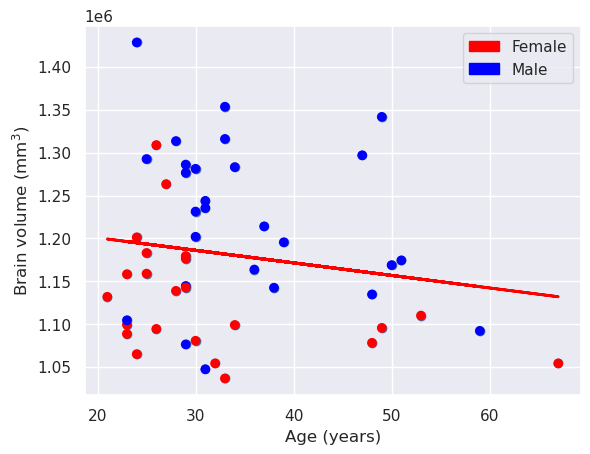

In [17]:
plt.scatter(x,y)
cols = {'Male': 'blue', 'Female': 'red'}
# Define the regression equation
y_hat = 1.23e+06 - 1463.6757*x
red_patch = mpatches.Patch(color='red', label='Female')
blue_patch = mpatches.Patch(color='blue', label='Male')
plt.legend(handles=[red_patch, blue_patch])
plt.scatter(x, y, c=data.Sex.map(cols))
# Plot the regression line
fig = plt.plot(x,y_hat, lw=2, c='red', label = 'regression line')
# Format the axes
plt.xlabel('Age (years)', fontsize = 12)
plt.ylabel('Brain volume (mm$^3$)', fontsize = 12)
plt.show()

Looking at sex differences, encode the Sex as categorical

In [18]:
mod = ols('brainvol ~ Age + C(Sex)', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               brainvol   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     10.64
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           0.000154
Time:                        09:25:12   Log-Likelihood:                -633.93
No. Observations:                  50   AIC:                             1274.
Df Residuals:                      47   BIC:                             1280.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.204e+06   3.88e+04     31.

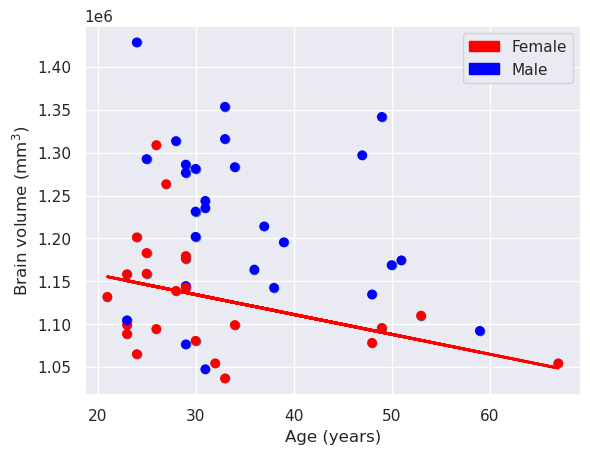

In [19]:
plt.scatter(x,y)
# Define the regression equation
y_hat = 1.204e+06 - 2317.7115*x

# Plot the regression line

fig = plt.plot(x,y_hat, lw=2, c='red', label = 'regression line')
plt.legend(handles=[red_patch, blue_patch])
plt.scatter(x, y, c=data.Sex.map(cols))
# Format the axes
plt.xlabel('Age (years)', fontsize = 12)
plt.ylabel('Brain volume (mm$^3$)', fontsize = 12)
plt.show()

In [20]:
mod = ols('brainvol ~ np.power(Age, 2) + Age + C(Sex)', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               brainvol   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     6.945
Date:                Wed, 25 Jun 2025   Prob (F-statistic):           0.000595
Time:                        09:25:17   Log-Likelihood:                -633.92
No. Observations:                  50   AIC:                             1276.
Df Residuals:                      46   BIC:                             1283.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.192e+06    1.5e+05  

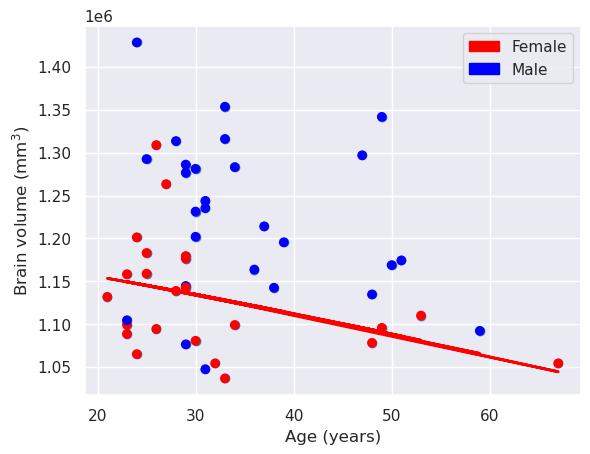

In [21]:
plt.scatter(x,y)
# Define the regression equation
y_hat = 1.192e+06 - 1671.4228*x - 7.9310*x*x
# Plot the regression line
fig = plt.plot(x,y_hat, lw=2, c='red', label = 'regression line')
plt.legend(handles=[red_patch, blue_patch])
plt.scatter(x, y, c=data.Sex.map(cols))
# Format the axes
plt.xlabel('Age (years)', fontsize = 12)
plt.ylabel('Brain volume (mm$^3$)', fontsize = 12)
plt.show()